# Anova
## Analisis de varianza

El objetivo es conocer si es razonable pensar que un efecto puede deberse al azar. En el caso anova sera categórico -> numérico. Buscamos comprobar si existe una diferencia significativa entre los valores medios de los grupos. Es una extensión de los t-test independientes para más de dos grupos.

Hacemos el test via permutaciones siendo un test no paramétrico, no necesitamos conocer las distribuciones de los datos de cada categoría.

Para nuestro ejemplo supongamos 4 estados, soltero, casado, separado o viudo vs presión en sangre :)

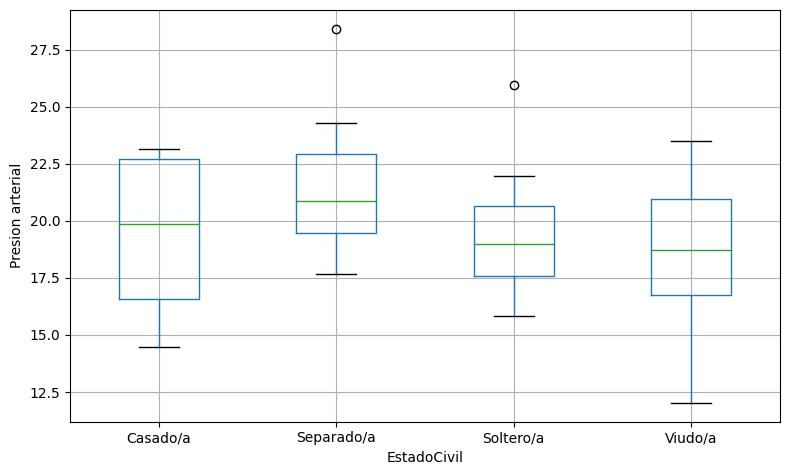

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
np.random.seed(42)
n_samples = 70
categories = ['Soltero/a', 'Casado/a', 'Separado/a', 'Viudo/a']

# Asocia promedios de target con categorías
category_means_sd = {'Soltero/a': (19,2.5), 'Casado/a': (20,3.5), 'Separado/a': (21,2.2), 'Viudo/a': (18,4)}

# Genera datos
categorical_column = np.random.choice(categories, size=n_samples)
target = np.zeros(n_samples)
for category, (mean, sd) in zip(category_means_sd.keys(), category_means_sd.values()):
    target[categorical_column == category] = np.random.normal(mean, sd, size=(categorical_column == category).sum())
    
df = pd.DataFrame({'EstadoCivil': categorical_column, 'Target': target})
df = shuffle(df).reset_index(drop=True)
ax = df.boxplot(by='EstadoCivil', column='Target', figsize=(8, 5))
ax.set_xlabel('EstadoCivil')
ax.set_ylabel('Presion arterial')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()
#df['EstadoCivil'].value_counts().plot(kind='bar')


Parece si hay una relación entre el estado civil y la presión...¿pero es real o se debe al azar? Por supuesto, asumo H0=ninguna diferencia, H1=existe diferencia

1.Agrupo todos los datos en una única caja</BR>
2.Mezclamos y extraemos 4 remuestreos con la cantidad original de elementos</BR>
3.Registramos la media de cada uno de los 4 grupos</BR>
4.Registramos la varianza entre las medias de los 4 grupos</BR>
5.Repetimos pasos 2 a 4 muchas, digamos 1000 veces</BR>
¿En que proporción de tiempo la varianza muestreada de forma repetida excedio al varianza observada? Ese es el valor de p.
(Bruce, Bruce y Gedeck)


In [14]:
# medias y varianzas observadas
#Atención que es la varianza entre los grupos(Intervarianza), no la varianza dentro del grupo (Intravarianza)
mean_intervariance = df.groupby('EstadoCivil').mean().var()[0]
print('Observed means:', df.groupby('EstadoCivil').mean().values.ravel())
print('Variance:', mean_intervariance)

Observed means: [19.55339574 21.31404554 19.40958978 18.71444172]
Variance: 1.2243778606309041


In [15]:
#TODO: simplificar usando:
def perm_test(df):
    df = df.copy()
    df['Target'] = np.random.permutation(df['Target'].values)
    return df.groupby('EstadoCivil').mean().var()[0]

In [16]:
#random.seed(1)
variances = []
for i in range(3000):
    variances.append(perm_test(df))   


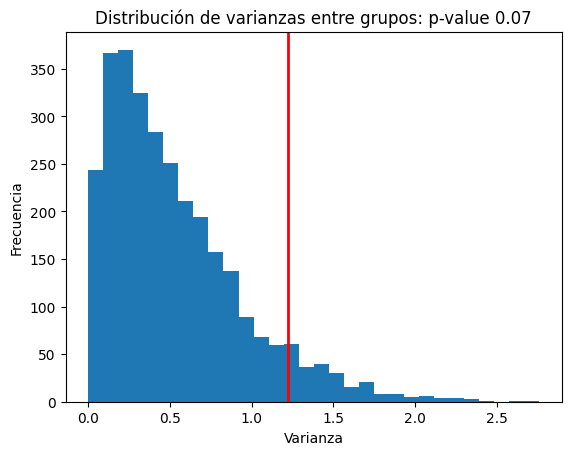

In [17]:
p_value = np.mean([var > mean_intervariance for var in variances])
plt.hist(variances, bins=30)
plt.axvline(x = mean_intervariance, color='r', lw=2)
plt.xlabel('Varianza')
plt.ylabel('Frecuencia')
plt.title('Distribución de varianzas entre grupos: p-value {:.2f}'.format(p_value))
plt.show()